## Linear Regression with 'Mini-Batch Gradient Descent'

In [1]:
# IMPORTS
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets._samples_generator import make_regression

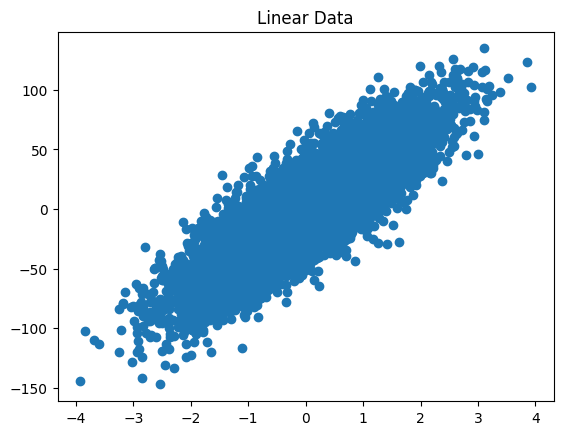

In [2]:
# Generate some data
X, y = make_regression(
    n_samples=10000,
    n_features=1,
    n_informative=1,
    noise=20,
    random_state=42,
)

# Plot this data
plt.scatter(X, y)
plt.title("Linear Data")
plt.show()

In [3]:
# Convert X to a 1d array
x = X.flatten()

# Compute the params -> 'stats'
slope, intercept, _, _, _ = stats.linregress(x, y)
print(f"Slope: {slope} - Intercept: {intercept}")

Slope: 31.76418969399418 - Intercept: 0.2624879982103165


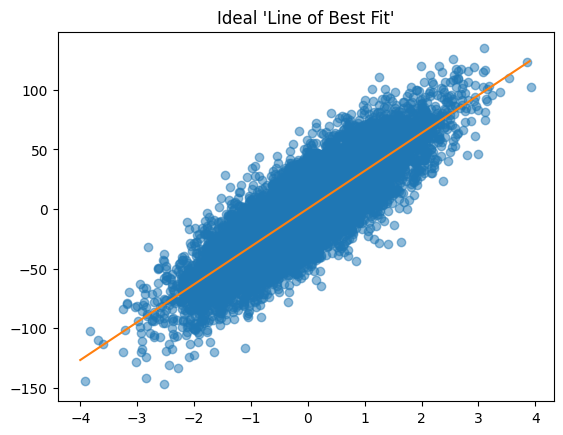

In [4]:
# Plot the ideal 'line of best fit'
best_fit = np.vectorize(lambda x: x * slope + intercept) # y = mx + b
plt.plot(x, y, 'o', alpha=0.5)
grid = np.arange(-4, 4, 0.1)
plt.plot(grid, best_fit(grid))
plt.title("Ideal 'Line of Best Fit'")
plt.show()

In [5]:
# Convert y to a 2d column vector
y = y.reshape(-1, 1)

In [6]:
# Define a function to log runtime
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"The runtime for {func.__name__}: {end_time - start_time:.4f}")
        return result
    return wrapper

In [7]:
# Define a function for the 'mini-batch gradient descent' algo
@timeit
def MBGD(X, y, *, learning_rate=0.1, n_epochs=1000,
        batch_size=32, tolerance=1e-6):
    m, n = X.shape
    weights = np.random.randn(n, 1)
    bias = 0

    costs = []
    epochs = []

    for epoch in range(n_epochs):
        random_samples = np.random.choice(m, batch_size, replace=False)
        xi = X[random_samples]
        yi = y[random_samples]
        y_pred = xi @ weights + bias # y = mx + b
        error = y_pred - yi
        w_grad = 2 * xi.T @ error / batch_size # divide by 'batch_size'
        b_grad = 2 * np.mean(error)

        print(f"Weights: {weights} - Bias: {bias} | Epoch: {epoch}")

        # Adjust weights and bias values
        weights = weights - learning_rate * w_grad
        bias = bias - learning_rate * b_grad

        # Check for convergence
        if np.linalg.norm(w_grad) < tolerance and np.abs(b_grad) < tolerance:
            print(f"Converged at epoch: {epoch}")
            break

        if epoch % 100 == 0:
            y_pred_full = X @ weights + bias
            loss = np.mean((y_pred_full-y)**2)
            costs.append(loss)
            epochs.append(epoch)

    return weights, bias, costs, epochs

weights, bias, costs, epochs = MBGD(X, y, learning_rate=0.001) # Adjusted lr for smoother convergence (fixed from video)

Weights: [[-0.98117137]] - Bias: 0 | Epoch: 0
Weights: [[-0.91869971]] - Bias: -0.018670639260164323 | Epoch: 1
Weights: [[-0.82240846]] - Bias: -0.018475664826281987 | Epoch: 2
Weights: [[-0.75181257]] - Bias: -0.006433765031329579 | Epoch: 3
Weights: [[-0.71652052]] - Bias: -0.013666027435415942 | Epoch: 4
Weights: [[-0.64805041]] - Bias: 0.004486813059091059 | Epoch: 5
Weights: [[-0.59377672]] - Bias: 0.020061927550318895 | Epoch: 6
Weights: [[-0.53399716]] - Bias: 0.022400285971682053 | Epoch: 7
Weights: [[-0.47354696]] - Bias: 0.019092551731776996 | Epoch: 8
Weights: [[-0.38305837]] - Bias: 0.015878337187526584 | Epoch: 9
Weights: [[-0.33564699]] - Bias: 0.009819270216219098 | Epoch: 10
Weights: [[-0.28611268]] - Bias: 0.004987256182643535 | Epoch: 11
Weights: [[-0.1851623]] - Bias: -0.022152720145853982 | Epoch: 12
Weights: [[-0.11258582]] - Bias: -0.01737726195256258 | Epoch: 13
Weights: [[-0.02725102]] - Bias: -0.03274688628948756 | Epoch: 14
Weights: [[0.0351408]] - Bias: -0.0

Weights: [[27.46852315]] - Bias: 0.2219203479081241


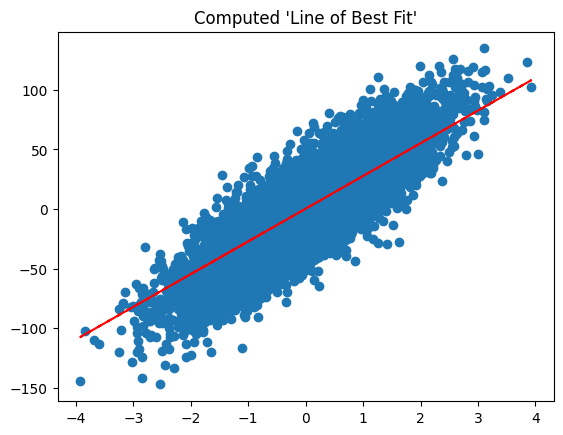

In [8]:
# Print out weights & bias
print(f"Weights: {weights} - Bias: {bias}")

# Define a function to make preds
def predict(X):
    return X @ weights + bias

preds = predict(X)

# Plot the results
plt.scatter(X, y)
plt.plot(X, preds, 'r--')
plt.title("Computed 'Line of Best Fit'")
plt.show()

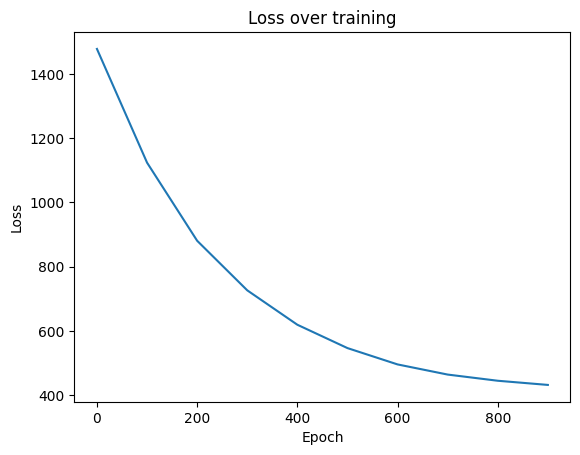

In [9]:
# Loss over training
plt.plot(epochs, costs)
plt.title("Loss over training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()